<a href="https://colab.research.google.com/github/Ritesh-panda/datascience-learnings/blob/main/churn_customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA EXPLORATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


In [2]:
df = pd.read_csv('/content/CustomerChurn (1).csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape


(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
#checking the descriptive statistics of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


INSIGHTS

1.   here senior citizen is a categorical data as only 0 and 1 is there

2.   75 %have less than 55 months of tenure

3.   avg is 64 but 25% ar paynig more than 89.85

In [9]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


DATA CLEANING

In [10]:
#A copy of the dataset
new_df = df.copy()

In [11]:
#as earlier we saw that the total charges was in object se we need to change it to the numeric value
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
#so here we got that the totla charges is having 11 missing values we have to fill it
mean=new_df.TotalCharges.mean()
median=new_df.TotalCharges.median()
print(mean)
print(median)

2283.3004408418656
1397.475


In [13]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Task
Visualize the distribution of the 'TotalCharges' column using a histogram and a Kernel Density Estimate (KDE) plot to determine its skewness. Then, impute the 11 missing values in the 'TotalCharges' column of the `new_df` DataFrame using either the mean or the median, based on the observed distribution. Finally, verify that all missing values in 'TotalCharges' have been successfully imputed.

## Visualize TotalCharges Distribution

### Subtask:
Plot a histogram and a distribution plot (kde) of the 'TotalCharges' column to visualize its distribution and assess skewness. This will help us decide the best strategy for imputing the missing values. The plot should include a title and appropriate labels.


**Reasoning**:
To visualize the distribution of 'TotalCharges' and assess its skewness, I will plot a histogram with a Kernel Density Estimate (KDE) line as instructed.



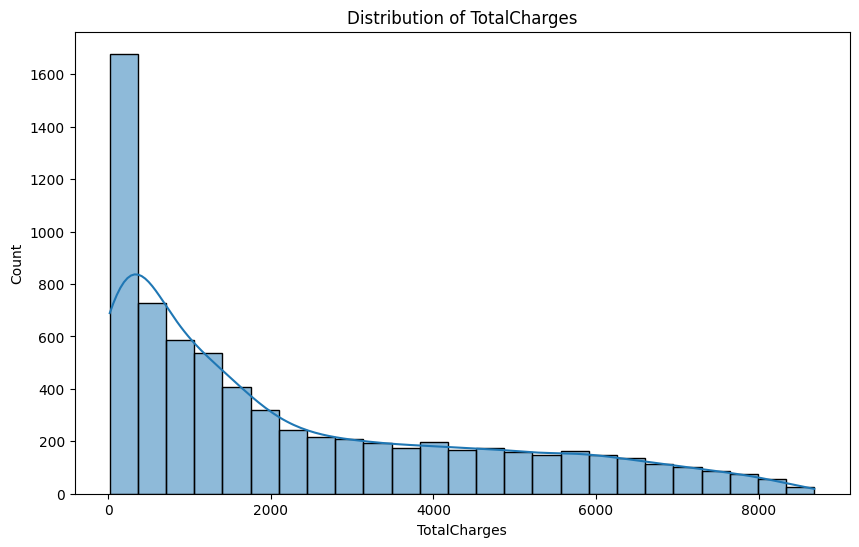

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(new_df['TotalCharges'], kde=True, ax=ax)
ax.set_title('Distribution of TotalCharges')
ax.set_xlabel('TotalCharges')
plt.show()

**Reasoning**:
Based on the histogram and KDE plot, the 'TotalCharges' distribution appears to be right-skewed. For skewed distributions, the median is a more robust measure to impute missing values than the mean. Therefore, I will impute the 11 missing values in the 'TotalCharges' column using its median value.



In [15]:
new_df['TotalCharges'].fillna(new_df['TotalCharges'].median(), inplace=True)
print("Missing values in 'TotalCharges' after imputation:")
print(new_df['TotalCharges'].isnull().sum())

Missing values in 'TotalCharges' after imputation:
0


/tmp/ipython-input-2582998735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['TotalCharges'].fillna(new_df['TotalCharges'].median(), inplace=True)


**Reasoning**:
The previous code generated a `FutureWarning` because `inplace=True` on a chained assignment (selecting a column and then calling a method on it) can lead to unexpected behavior as it might operate on a copy. To fix this, the `fillna` operation should be assigned back to the column directly, ensuring the modification applies to the original DataFrame and addressing the warning.



In [16]:
new_df['TotalCharges'] = new_df['TotalCharges'].fillna(new_df['TotalCharges'].median())
print("Missing values in 'TotalCharges' after imputation:")
print(new_df['TotalCharges'].isnull().sum())

Missing values in 'TotalCharges' after imputation:
0


## Final Task

### Subtask:
Confirm that the 'TotalCharges' column has been successfully imputed and is ready for further analysis.


## Summary:

### Data Analysis Key Findings
*   The `TotalCharges` column exhibited a right-skewed distribution, as revealed by the histogram and Kernel Density Estimate (KDE) plot.
*   Based on the observed right-skewness, the 11 missing values in the `TotalCharges` column were imputed using the median of the column.
*   After imputation, the `TotalCharges` column successfully contained 0 missing values, confirming the completion of the task.

### Insights or Next Steps
*   Using the median for imputation in a right-skewed distribution helps to mitigate the influence of outliers and maintains a more representative central tendency compared to using the mean.
*   The `TotalCharges` column is now cleaned and ready for further statistical analysis or model building, without issues related to missing data.


In [17]:
new_df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


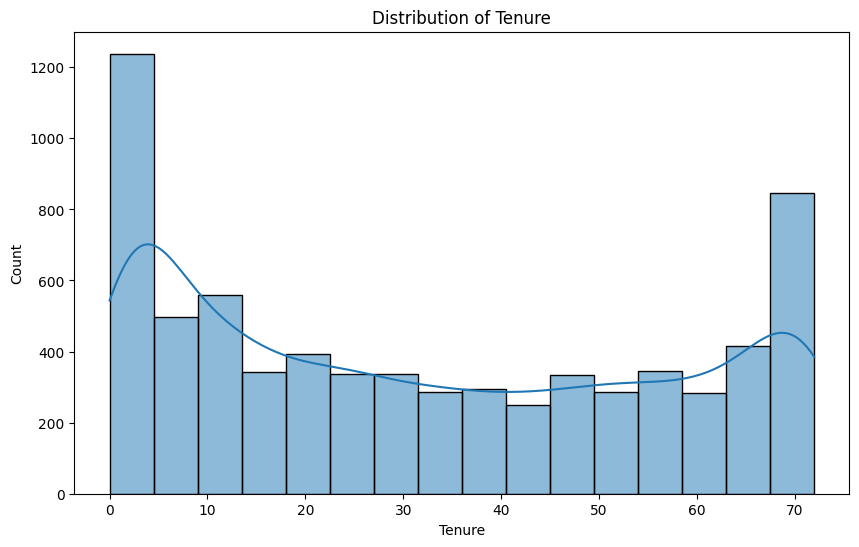

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(new_df['tenure'], kde=True, ax=ax)
ax.set_title('Distribution of Tenure')
ax.set_xlabel('Tenure')
plt.show()

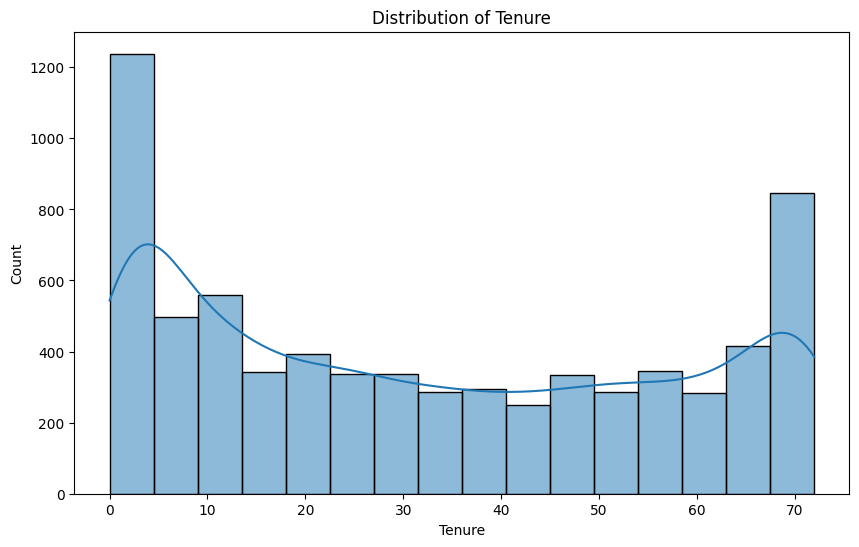

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(new_df['tenure'], kde=True, ax=ax)
ax.set_title('Distribution of Tenure')
ax.set_xlabel('Tenure')
plt.show()

The histogram and Kernel Density Estimate (KDE) plot for 'tenure' has been generated. Looking at the plot, it appears that the distribution of customer tenure is somewhat right-skewed, with a higher concentration of customers in the lower tenure ranges (0-12 months) and a gradual decrease as tenure increases, but also a noticeable peak towards the higher end (60-72 months). This indicates that many customers are either new or long-term, with fewer in the mid-range.



## Refined Feature Binning for Tenure

### Subtask:
Given the large number of customers in the '5+ Years' tenure group, let's refine the binning to provide more detail for longer tenures. Create new categorical bins for the 'tenure' column in `new_df` with the following refined ranges:
- Less than 12 months (0-1 Year)
- 12-24 months (1-2 Years)
- 24-36 months (2-3 Years)
- 36-48 months (3-4 Years)
- 48-60 months (4-5 Years)
- 60-72 months (5-6 Years)
- Greater than 72 months (6+ Years)

Then, display the value counts of the newly created binned column (`tenure_group_refined`) to confirm the updated operation.

**Reasoning**:
To address the broad '5+ Years' category, I will redefine the bins and labels for the 'tenure' column. I'll introduce additional bins to split the 5+ year range into more specific groups like '5-6 Years' and '6+ Years'. The `pd.cut` function will be used again with these new definitions to create a new column named 'tenure_group_refined', and its `value_counts()` will be displayed to show the updated distribution.

In [20]:
refined_bins = [0, 12, 24, 36, 48, 60, 72, new_df['tenure'].max() + 1]
refined_labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5-6 Years', '6+ Years']

new_df['tenure_group_refined'] = pd.cut(new_df['tenure'], bins=refined_bins, labels=refined_labels, right=False)

print("Value counts for 'tenure_group_refined':")
print(new_df['tenure_group_refined'].value_counts())

Value counts for 'tenure_group_refined':
tenure_group_refined
0-1 Year     2069
5-6 Years    1121
1-2 Years    1047
2-3 Years     876
4-5 Years     820
3-4 Years     748
6+ Years      362
Name: count, dtype: int64


## Feature Binning for Tenure

### Subtask:
Create new categorical bins for the 'tenure' column in `new_df` based on the following ranges:
- Less than 12 months (0-1 Year)
- 12-24 months (1-2 Years)
- 24-36 months (2-3 Years)
- 36-48 months (3-4 Years)
- 48-60 months (4-5 Years)
- Greater than 60 months (5+ Years)

Then, display the value counts of the newly created binned column to confirm the operation.

**Reasoning**:
To categorize the 'tenure' column into specified bins, I will define a set of bins and corresponding labels. The `pd.cut` function will then be used to segment the 'tenure' values into these bins, creating a new categorical column named 'tenure_group'. Finally, `value_counts()` will be called on this new column to display the distribution of customers across the different tenure groups.

In [21]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']

new_df['tenure_group'] = pd.cut(new_df['tenure'], bins=bins, labels=labels, right=False)

print("Value counts for 'tenure_group':")
print(new_df['tenure_group'].value_counts())

Value counts for 'tenure_group':
tenure_group
0-1 Year     2069
5+ Years     1121
1-2 Years    1047
2-3 Years     876
4-5 Years     820
3-4 Years     748
Name: count, dtype: int64


In [22]:
columns_to_drop = ['customerID', 'tenure', 'tenure_group']
new_df = new_df.drop(columns=columns_to_drop)

print("Columns after dropping:")
print(new_df.columns.values)
print("\nShape after dropping:")
print(new_df.shape)

Columns after dropping:
['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn' 'tenure_group_refined']

Shape after dropping:
(7043, 20)


In [23]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group_refined
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 Years
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Years
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year


UNIVARIATE ANALYSIS


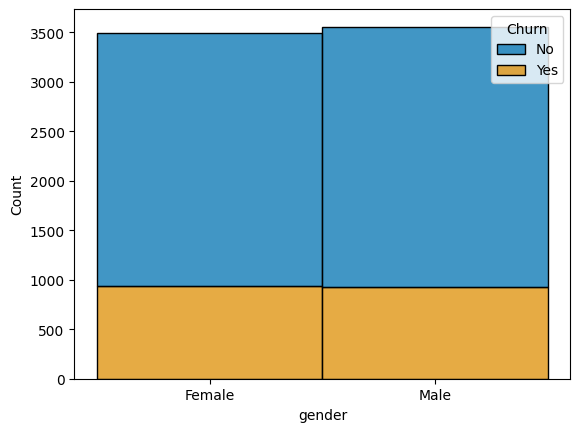

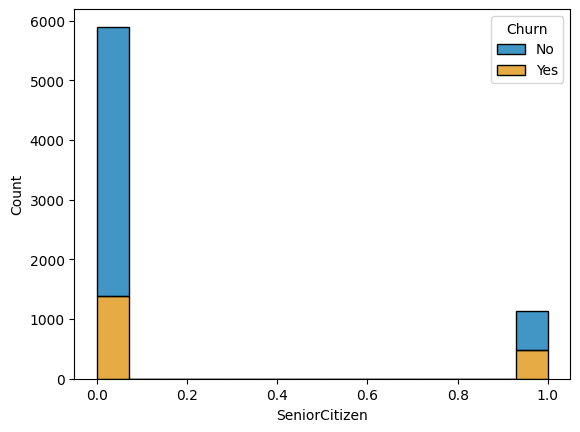

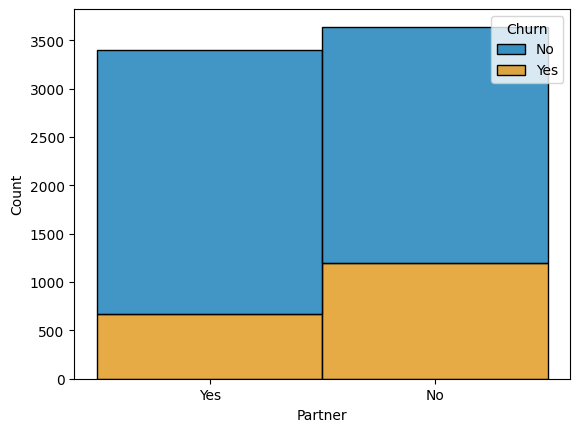

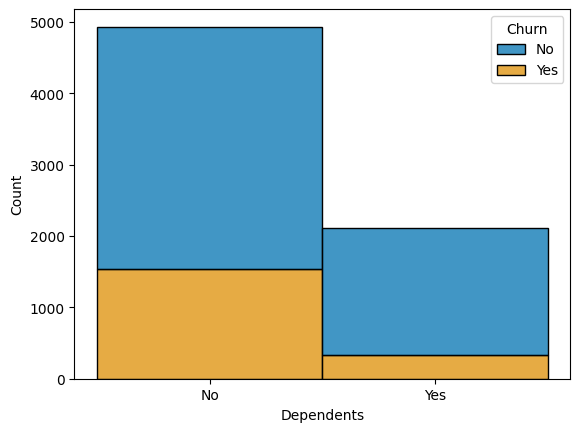

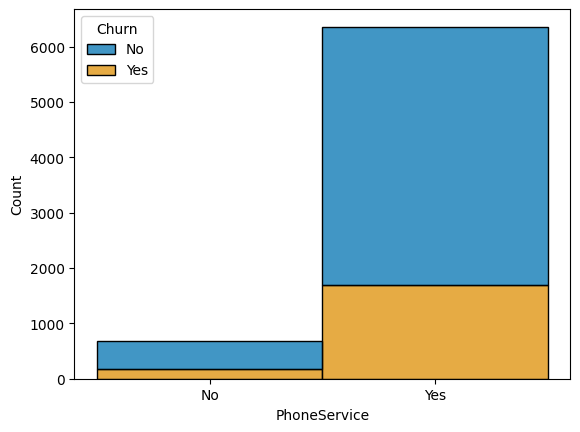

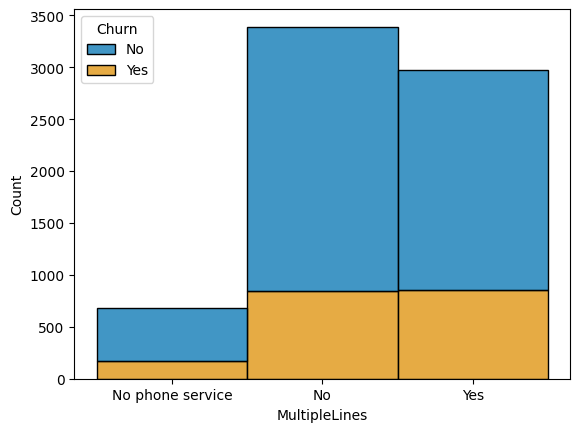

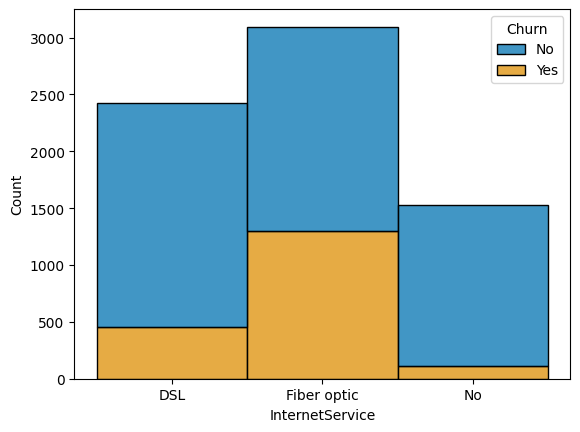

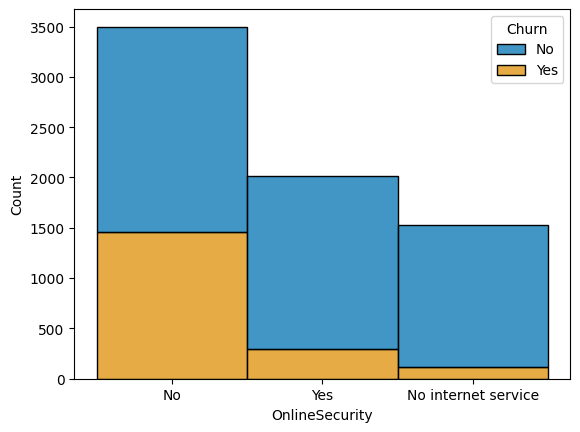

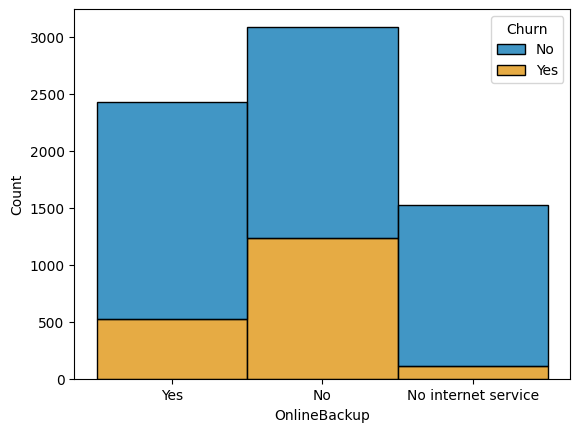

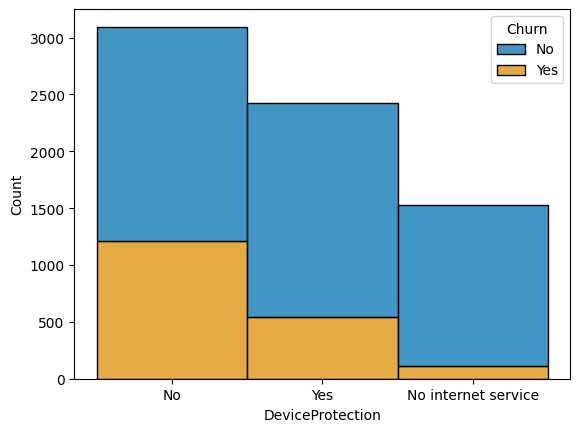

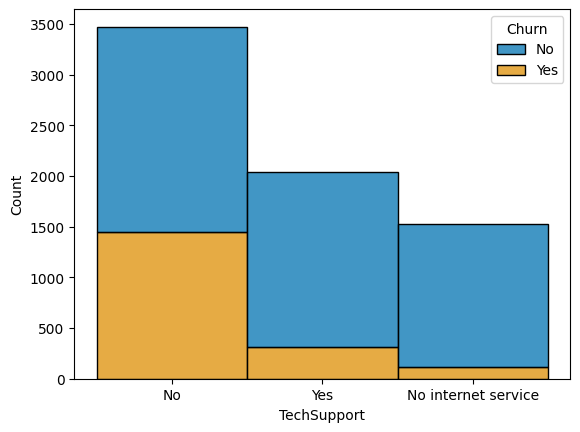

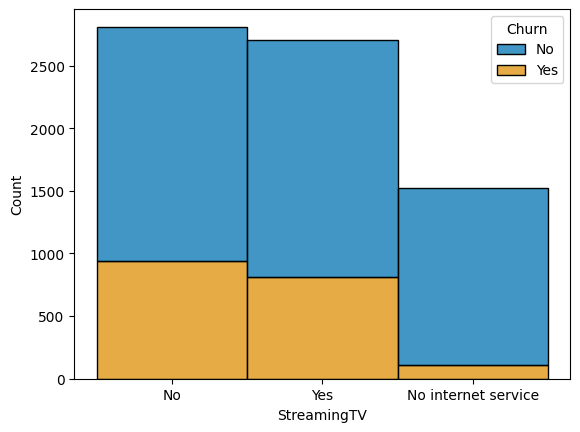

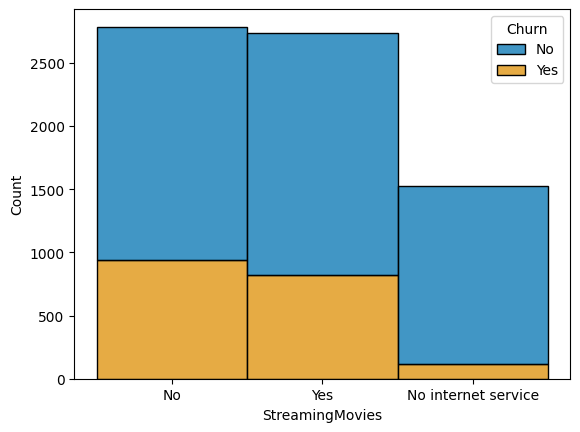

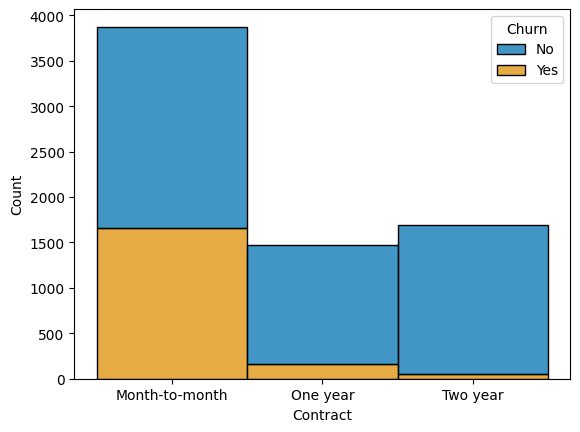

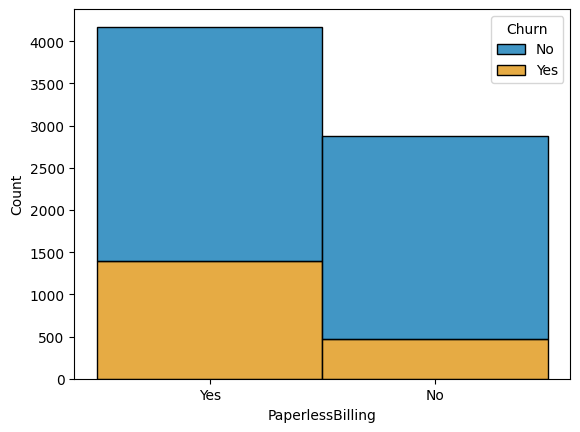

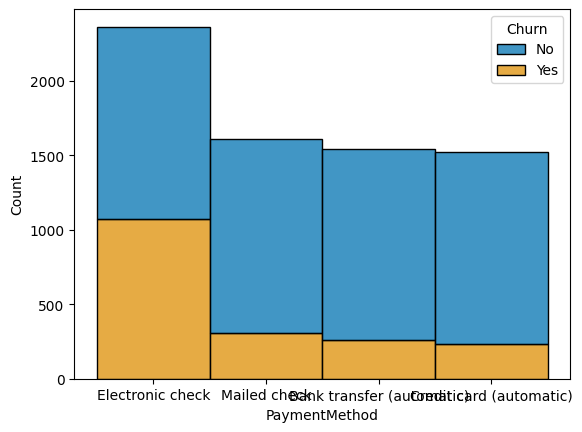

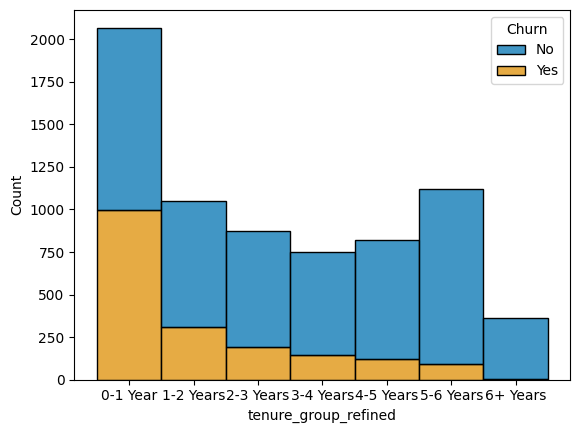

In [25]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.histplot(data=new_df, x=predictor, hue='Churn', multiple='stack', palette='colorblind')



1.   monthly contracts are likely to be churned
2.   senior citizen are likely to churn
3.   single's are likely to churn





NUMERICAL ANAYLSIS

In [26]:
pd.crosstab(new_df['Churn'], new_df['tenure_group_refined'])

tenure_group_refined,0-1 Year,1-2 Years,2-3 Years,3-4 Years,4-5 Years,5-6 Years,6+ Years
Churn,,,,,,,
No,1070,738,683,602,697,1028,356
Yes,999,309,193,146,123,93,6


here we can see that 0-1 year tenure are more likely to churn with almost 50 percent

In [27]:
pd.crosstab(new_df['PaymentMethod'], new_df['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


here we can see that the electronic checks are more likely to churn as its having a percentage of 45%

In [29]:
#converting the churn into 1 and 0
new_df['Churn'] = new_df['Churn'].replace({'No': 0, 'Yes': 1})

/tmp/ipython-input-2904058702.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Churn'] = new_df['Churn'].replace({'No': 0, 'Yes': 1})


In [31]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group_refined
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Years
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Years
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year


In [37]:
#convert all categorical variable into dummy variables
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_refined_0-1 Year,tenure_group_refined_1-2 Years,tenure_group_refined_2-3 Years,tenure_group_refined_3-4 Years,tenure_group_refined_4-5 Years,tenure_group_refined_5-6 Years,tenure_group_refined_6+ Years
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,True,False,True,False,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,False,True,False,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,True,True,False,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,True,False,False,False,False,False,False


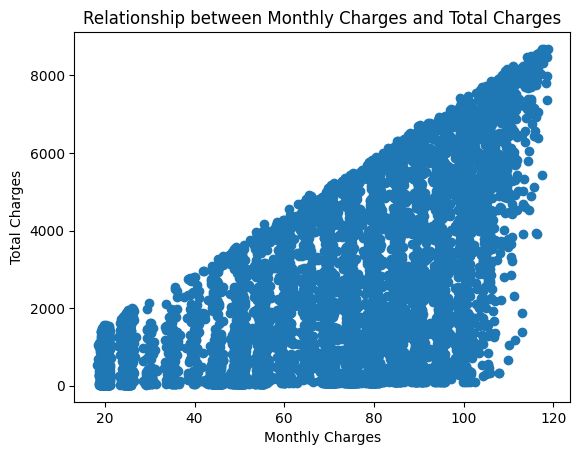

In [39]:
#relationship between monthly charges and total charges
plt.scatter(new_df_dummies['MonthlyCharges'], new_df_dummies['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()

+ve correlated

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

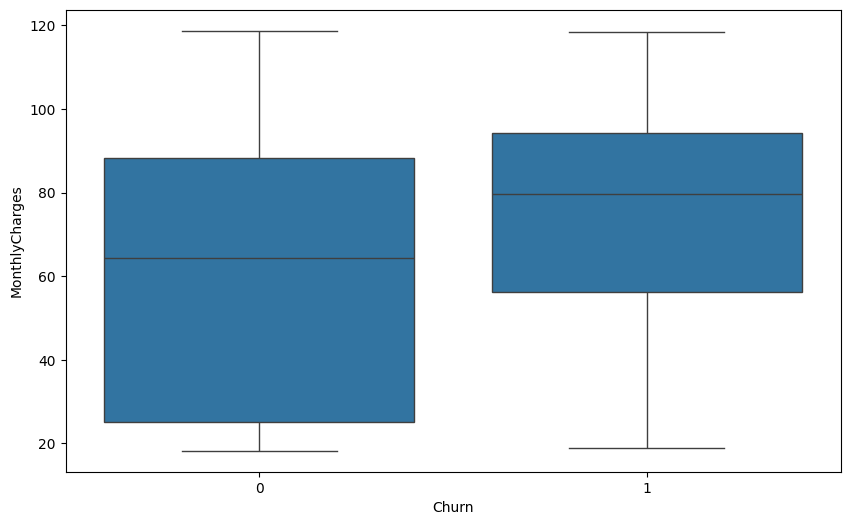

In [40]:
#churn by monthly and total charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=new_df_dummies)

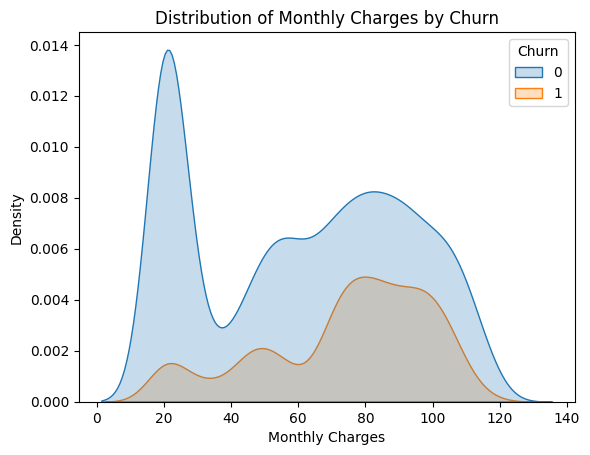

In [41]:
#churn by monthly and total charges
mth= sns.kdeplot(data=new_df_dummies, x='MonthlyCharges', hue='Churn', fill=True)
mth.set_xlabel('Monthly Charges')
mth.set_ylabel('Density')
mth.set_title('Distribution of Monthly Charges by Churn')
plt.show()